<a href="https://colab.research.google.com/github/jdbj89/ml_repo/blob/main/Samay_ML_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Samay - Machine Learning Test** -- By Jose Daniel Bolaños - ML Engineer


## **Task 1 - Load the dataset and preliminary analysis**


###**1. Download Dataset from Kaggle**

**Install Kaggle Python library**

In [9]:
! pip install -q kaggle

**Upload Kaggle.json**

Head over to the settings of your Kaggle account. Go to the API section, and click "Create New Token". This will give you a kaggle.json. Upload that file.

In [10]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"josedanielbolaos","key":"74d4452ca95c317ff7275215537d6448"}'}

**Create a temp directory, copy the json file and change permission**

In [11]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Download Dataset**

In [12]:
!kaggle datasets download arashnic/lung-dataset

Dataset URL: https://www.kaggle.com/datasets/arashnic/lung-dataset
License(s): Attribution-NoDerivatives 4.0 International (CC BY-ND 4.0)
 89% 58.0M/65.5M [00:00<00:00, 68.6MB/s]
100% 65.5M/65.5M [00:01<00:00, 65.6MB/s]


**Create folder for the data and Unzip**


In [13]:
!mkdir kaggle_data
!unzip lung-dataset.zip -d kaggle_data/

mkdir: cannot create directory ‘kaggle_data’: File exists
Archive:  lung-dataset.zip
  inflating: kaggle_data/Audio Files/BP100_N,N,P R M,70,F.wav  
  inflating: kaggle_data/Audio Files/BP101_Asthma,E W,P L M,12,F.wav  
  inflating: kaggle_data/Audio Files/BP102_N,N,P L L,41,M.wav  
  inflating: kaggle_data/Audio Files/BP103_N,N,P R U,81,F.wav  
  inflating: kaggle_data/Audio Files/BP104_Asthma,E W,P L U,45,F.wav  
  inflating: kaggle_data/Audio Files/BP105_Lung Fibrosis,Crep,A U R,44,M.wav  
  inflating: kaggle_data/Audio Files/BP106_Asthma,E W,P L U,45,F.wav  
  inflating: kaggle_data/Audio Files/BP107_Asthma,E W,P L U,59,F.wav  
  inflating: kaggle_data/Audio Files/BP108_COPD,E W,P R L ,63,M.wav  
  inflating: kaggle_data/Audio Files/BP109_N,N,P L M,26,M.wav  
  inflating: kaggle_data/Audio Files/BP10_Asthma,E W,P R U,59,M.wav  
  inflating: kaggle_data/Audio Files/BP110_COPD,E W,P L L,62,M.wav  
  inflating: kaggle_data/Audio Files/BP111_COPD,E W,P R L ,51,M.wav  
  inflating: kagg

**Save filenames**

In [14]:
import os
file_paths = []
for dirname, _, filenames in os.walk('kaggle_data/Audio Files/'):
    for filename in filenames:
        #print(filename)
        file_paths.append(os.path.join(dirname,filename))

### **2. Analyze Database Annotations**

**Function to generate Age ranges**

In [15]:
def get_age_range(age):
  if age>=0 and age<20:
    return 'Age-1'
  elif age>=20 and age<40:
    return 'Age-2'
  elif age>=40 and age<60:
    return 'Age-3'
  elif age>=60 and age<80:
    return 'Age-4'
  elif age>=80:
    return 'Age-5'

**Take a look to the Annotations**

In [16]:
import pandas as pd

#diagnosis_data = pd.read_excel('kaggle_data/Data annotation.xlsx')
df_annotations = pd.read_excel('kaggle_data/Data annotation.xlsx',usecols='A,B,C,D,E',names=['age','sex','location', 'sound_type', 'disease'], dtype=str)
df_annotations = df_annotations.assign(patient=df_annotations.reset_index().index + 1)
display(df_annotations.head(4))

,age,sex,location,sound_type,disease,patient
0,70,M,P L L,I E W,Asthma,1
1,52,F,P L L,E W,Asthma,2
2,50,F,P L L,I E W,Asthma,3
3,72,F,P R L,I C,Heart Failure + Lung Fibrosis,4


**Drop null values**

In [17]:
print(len(df_annotations))
print(df_annotations.isna().sum())
df_annotations.dropna(axis=0, how="any", inplace=True)
df_annotations.reset_index(drop=True, inplace=True)
print(df_annotations.isna().sum())
print(len(df_annotations))

154
age           42
sex           42
location      42
sound_type    42
disease       42
patient        0
dtype: int64
age           0
sex           0
location      0
sound_type    0
disease       0
patient       0
dtype: int64
112


**Lowercase, Strip and Remove spaces**

In [18]:
df_annotations['disease']=df_annotations['disease'].str.lower()
df_annotations['location']=df_annotations['location'].str.strip()
df_annotations['location']=df_annotations['location'].str.replace(' ','')
df_annotations['sound_type']=df_annotations['sound_type'].str.strip()
df_annotations['sound_type']=df_annotations['sound_type'].str.replace(' ','')
display(df_annotations.head(4))

,age,sex,location,sound_type,disease,patient
0,70,M,PLL,IEW,asthma,1
1,52,F,PLL,EW,asthma,2
2,50,F,PLL,IEW,asthma,3
3,72,F,PRL,IC,heart failure + lung fibrosis,4


**Generate age ranges**

In [19]:
df_annotations['age_range']=df_annotations['age'].apply(lambda x: get_age_range(int(x)))
display(df_annotations.head(4))

,age,sex,location,sound_type,disease,patient,age_range
0,70,M,PLL,IEW,asthma,1,Age-4
1,52,F,PLL,EW,asthma,2,Age-3
2,50,F,PLL,IEW,asthma,3,Age-3
3,72,F,PRL,IC,heart failure + lung fibrosis,4,Age-4


**Disease Distribution**

disease
n                                 35
asthma                            32
heart failure                     18
copd                               9
pneumonia                          5
lung fibrosis                      4
bron                               3
heart failure + copd               2
plueral effusion                   2
heart failure + lung fibrosis      1
asthma and lung fibrosis           1
Name: count, dtype: int64


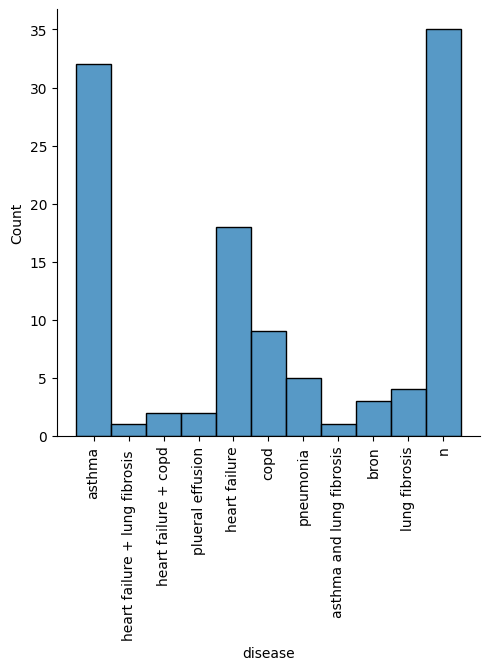

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df_annotations.disease)
plt.xticks(rotation=90)
print (df_annotations.disease.value_counts())

**Age Distribution**

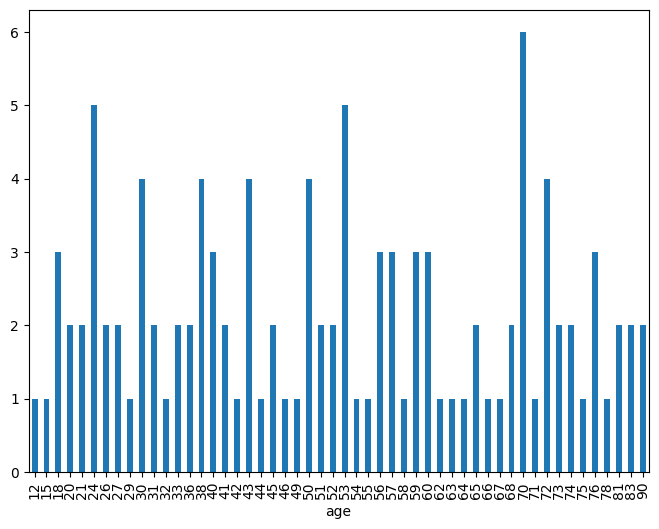

In [21]:
fig = plt.figure(figsize=(8,6))
df_annotations.groupby('age').disease.count().plot.bar(ylim=0)
plt.show()

**Age range Distribution**

age_range
Age-3    40
Age-4    32
Age-2    29
Age-5     6
Age-1     5
Name: count, dtype: int64


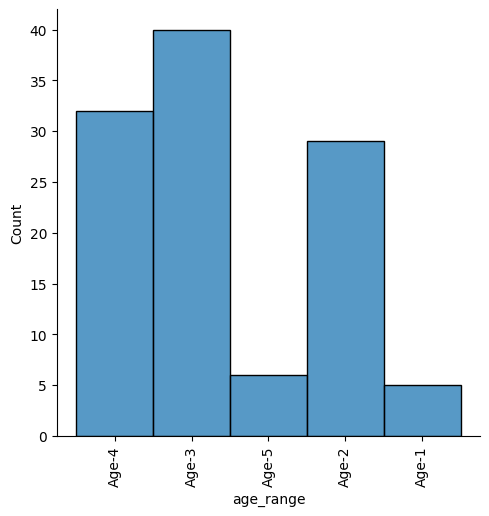

In [22]:
sns.displot(df_annotations.age_range)
plt.xticks(rotation=90)
print (df_annotations.age_range.value_counts())

**Gender Distribution**

sex
M    69
F    43
Name: count, dtype: int64


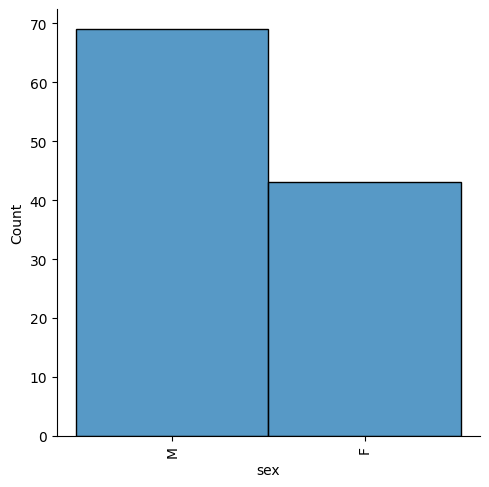

In [23]:
sns.displot(df_annotations.sex)
plt.xticks(rotation=90)
print (df_annotations.sex.value_counts())

**Location Distribution**

location
PRL    24
PLL    19
PRM    16
PRU    14
PLM    12
PLU    11
ARU     6
ARM     4
ARL     4
ALU     2
Name: count, dtype: int64


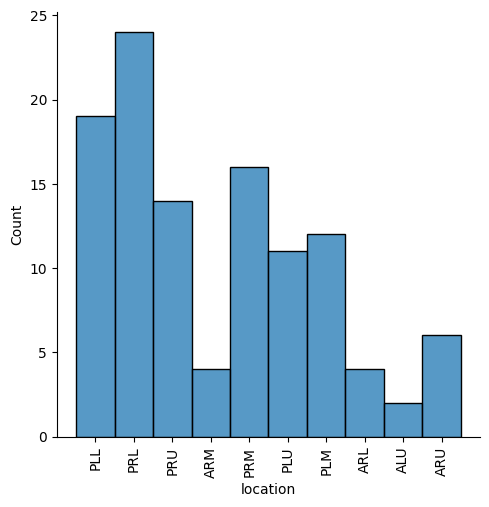

In [24]:
sns.displot(df_annotations.location)
plt.xticks(rotation=90)
print (df_annotations.location.value_counts())

**Sound Type distribution**

sound_type
EW           39
N            35
Crep         23
C             7
IEW           2
ICEW          2
ICB           2
IC            1
Bronchial     1
Name: count, dtype: int64


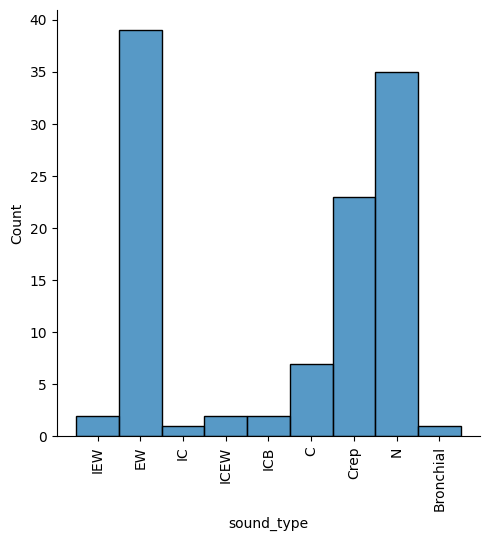

In [25]:
sns.displot(df_annotations.sound_type)
plt.xticks(rotation=90)
print (df_annotations.sound_type.value_counts())

**Disease vs Sound type**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'asthma'),
  Text(1, 0, 'heart failure + lung fibrosis '),
  Text(2, 0, 'heart failure + copd'),
  Text(3, 0, 'plueral effusion'),
  Text(4, 0, 'heart failure'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'pneumonia'),
  Text(7, 0, 'asthma and lung fibrosis'),
  Text(8, 0, 'bron'),
  Text(9, 0, 'lung fibrosis'),
  Text(10, 0, 'n')])

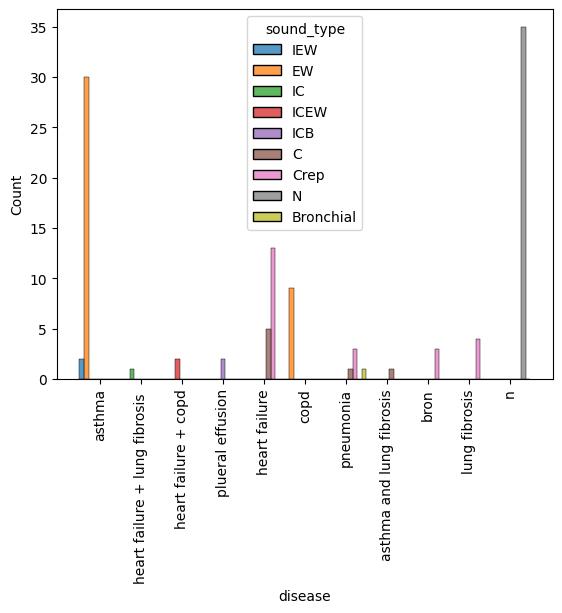

In [26]:
sns.histplot(binwidth=1,
            x=df_annotations.disease,
            hue=df_annotations.sound_type,
            data=df_annotations,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90)

**Disease vs Age range**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'asthma'),
  Text(1, 0, 'heart failure + lung fibrosis '),
  Text(2, 0, 'heart failure + copd'),
  Text(3, 0, 'plueral effusion'),
  Text(4, 0, 'heart failure'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'pneumonia'),
  Text(7, 0, 'asthma and lung fibrosis'),
  Text(8, 0, 'bron'),
  Text(9, 0, 'lung fibrosis'),
  Text(10, 0, 'n')])

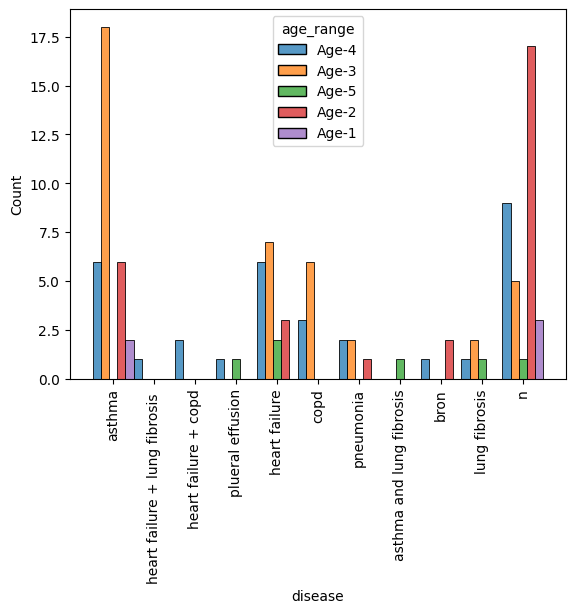

In [27]:
sns.histplot(binwidth=1,
            x=df_annotations.disease,
            hue=df_annotations.age_range,
            data=df_annotations,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90)

**Disease vs Sex**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'asthma'),
  Text(1, 0, 'heart failure + lung fibrosis '),
  Text(2, 0, 'heart failure + copd'),
  Text(3, 0, 'plueral effusion'),
  Text(4, 0, 'heart failure'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'pneumonia'),
  Text(7, 0, 'asthma and lung fibrosis'),
  Text(8, 0, 'bron'),
  Text(9, 0, 'lung fibrosis'),
  Text(10, 0, 'n')])

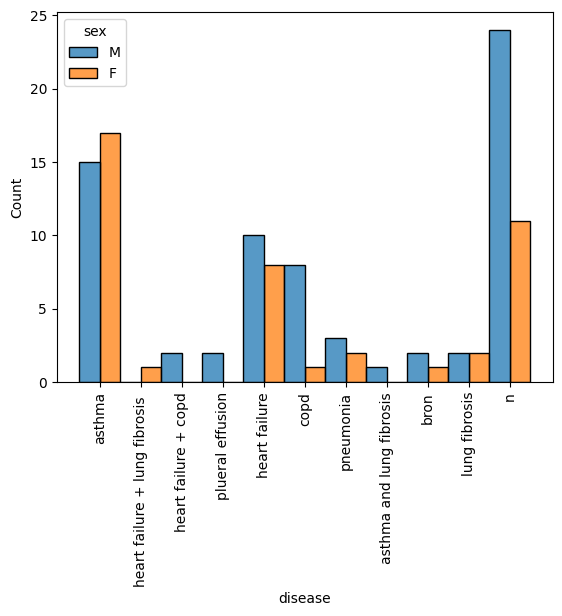

In [28]:
sns.histplot(binwidth=1,
            x=df_annotations.disease,
            hue=df_annotations.sex,
            data=df_annotations,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90)

**Disease Vs Location**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'asthma'),
  Text(1, 0, 'heart failure + lung fibrosis '),
  Text(2, 0, 'heart failure + copd'),
  Text(3, 0, 'plueral effusion'),
  Text(4, 0, 'heart failure'),
  Text(5, 0, 'copd'),
  Text(6, 0, 'pneumonia'),
  Text(7, 0, 'asthma and lung fibrosis'),
  Text(8, 0, 'bron'),
  Text(9, 0, 'lung fibrosis'),
  Text(10, 0, 'n')])

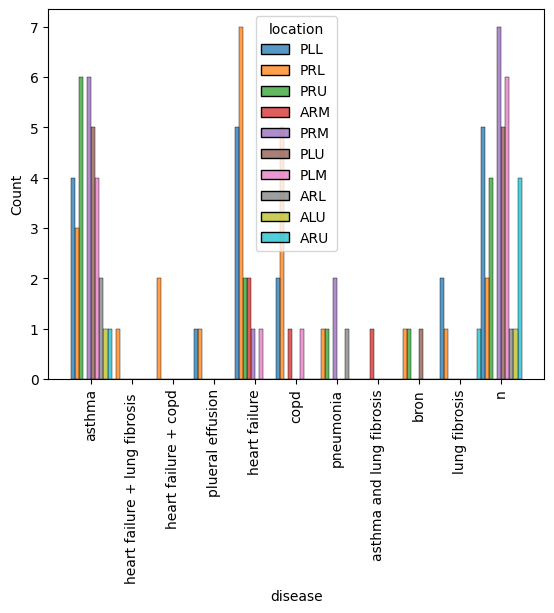

In [29]:
sns.histplot(binwidth=1,
            x=df_annotations.disease,
            hue=df_annotations.location,
            data=df_annotations,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90)

Data Correlation

In [30]:
df_corr=pd.DataFrame()

df_corr['age']=df_annotations['age'].apply(lambda x: int(x)/10)
df_corr['sex']=df_annotations['sex'].factorize()[0]
df_corr['location']=df_annotations['location'].factorize()[0]
df_corr['sound_type']=df_annotations['sound_type'].factorize()[0]
df_corr['disease']=df_annotations['disease'].factorize()[0]
df_corr['age_range']=df_annotations['age_range'].factorize()[0]
display(df_corr)

,age,sex,location,sound_type,disease,age_range
0,7.0,0,0,0,0,0
1,5.2,1,0,1,0,1
2,5.0,1,0,0,0,1
3,7.2,1,1,2,1,0
4,7.1,0,1,3,2,0
...,...,...,...,...,...,...
107,6.3,0,1,1,5,0
108,2.6,0,6,7,10,3
109,6.2,0,0,1,5,0
110,5.1,0,1,1,5,1


<Axes: >

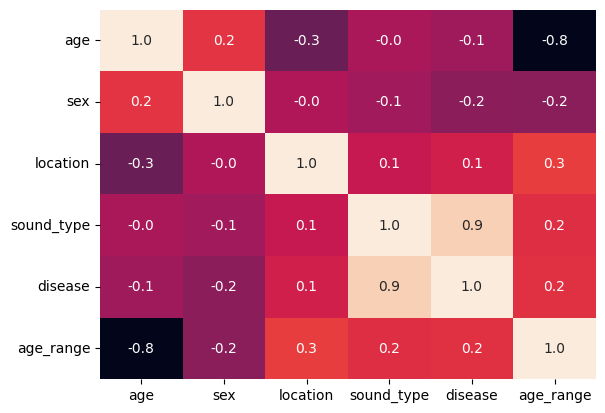

In [31]:
import seaborn as sns
sns.heatmap(df_corr.corr(), cbar = False, annot = True, fmt=".1f")

## **Task 2 - Signal Processing and Features Engineering**

### **1. Signal Processing (Waveform, FFT, and MFCCs)**

**Function to get the patient and filtering mode from the filename**

In [32]:
def get_name_vals(file_name):
    disease_names = []

    filenames = file_name.split("/")
    parts = filenames[2].split(",")

    filter_patient = parts[0].split("_")
    filter=filter_patient[0][0:1]
    patient=filter_patient[0][2:]

    return filter, patient

**store the specific filename of each patient according to the filtering mode letter**

In [33]:
df_annotations["B"] = ""
df_annotations["D"] = ""
df_annotations["E"] = ""

for j in file_paths:
  filter, patient = get_name_vals(j)
  df_annotations.loc[df_annotations.patient==int(patient), filter]=j

display(df_annotations.head(10))


,age,sex,location,sound_type,disease,patient,age_range,B,D,E
0,70,M,PLL,IEW,asthma,1,Age-4,"kaggle_data/Audio Files/BP1_Asthma,I E W,P L L...","kaggle_data/Audio Files/DP1_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP1_Asthma,I E W,P L L..."
1,52,F,PLL,EW,asthma,2,Age-3,"kaggle_data/Audio Files/BP2_Asthma,E W,P L L R...","kaggle_data/Audio Files/DP2_Asthma,E W,P L L R...","kaggle_data/Audio Files/EP2_Asthma,E W,P L L R..."
2,50,F,PLL,IEW,asthma,3,Age-3,"kaggle_data/Audio Files/BP3_Asthma,I E W,P L L...","kaggle_data/Audio Files/DP3_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP3_Asthma,I E W,P L L..."
3,72,F,PRL,IC,heart failure + lung fibrosis,4,Age-4,kaggle_data/Audio Files/BP4_Heart Failure + Lu...,kaggle_data/Audio Files/DP4_Heart Failure + Lu...,kaggle_data/Audio Files/EP4_Heart Failure + Lu...
4,71,M,PRL,ICEW,heart failure + copd,5,Age-4,kaggle_data/Audio Files/BP5_Heart Failure + CO...,kaggle_data/Audio Files/DP5_Heart Failure + CO...,kaggle_data/Audio Files/EP5_Heart Failure + CO...
5,81,M,PRL,ICB,plueral effusion,6,Age-5,"kaggle_data/Audio Files/BP6_Plueral Effusion,I...","kaggle_data/Audio Files/DP6_Plueral Effusion,I...","kaggle_data/Audio Files/EP6_Plueral Effusion,I..."
6,65,M,PRL,ICEW,heart failure + copd,7,Age-4,kaggle_data/Audio Files/BP7_Heart Failure + CO...,kaggle_data/Audio Files/DP7_Heart Failure + CO...,kaggle_data/Audio Files/EP7_Heart Failure + CO...
7,70,M,PLL,ICB,plueral effusion,8,Age-4,"kaggle_data/Audio Files/BP8_Plueral Effusion,I...","kaggle_data/Audio Files/DP8_Plueral Effusion,I...","kaggle_data/Audio Files/EP8_Plueral Effusion,I..."
8,59,M,PRL,EW,asthma,9,Age-3,"kaggle_data/Audio Files/BP9_Asthma,E W,P R L ,...","kaggle_data/Audio Files/DP9_Asthma,E W,P R L ,...","kaggle_data/Audio Files/EP9_Asthma,E W,P R L ,..."
9,59,M,PRU,EW,asthma,10,Age-3,"kaggle_data/Audio Files/BP10_Asthma,E W,P R U,...","kaggle_data/Audio Files/DP10_Asthma,E W,P R U,...","kaggle_data/Audio Files/EP10_Asthma,E W,P R U,..."


**filter out taking just the disease values  “asthma”, “copd”, “'heart failure” and “n”**


In [34]:
diseases=['asthma', 'heart failure', 'copd', 'n']
df_diseases = df_annotations.loc[df_annotations['disease'].isin(diseases)]
display(df_diseases)

,age,sex,location,sound_type,disease,patient,age_range,B,D,E
0,70,M,PLL,IEW,asthma,1,Age-4,"kaggle_data/Audio Files/BP1_Asthma,I E W,P L L...","kaggle_data/Audio Files/DP1_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP1_Asthma,I E W,P L L..."
1,52,F,PLL,EW,asthma,2,Age-3,"kaggle_data/Audio Files/BP2_Asthma,E W,P L L R...","kaggle_data/Audio Files/DP2_Asthma,E W,P L L R...","kaggle_data/Audio Files/EP2_Asthma,E W,P L L R..."
2,50,F,PLL,IEW,asthma,3,Age-3,"kaggle_data/Audio Files/BP3_Asthma,I E W,P L L...","kaggle_data/Audio Files/DP3_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP3_Asthma,I E W,P L L..."
8,59,M,PRL,EW,asthma,9,Age-3,"kaggle_data/Audio Files/BP9_Asthma,E W,P R L ,...","kaggle_data/Audio Files/DP9_Asthma,E W,P R L ,...","kaggle_data/Audio Files/EP9_Asthma,E W,P R L ,..."
9,59,M,PRU,EW,asthma,10,Age-3,"kaggle_data/Audio Files/BP10_Asthma,E W,P R U,...","kaggle_data/Audio Files/DP10_Asthma,E W,P R U,...","kaggle_data/Audio Files/EP10_Asthma,E W,P R U,..."
...,...,...,...,...,...,...,...,...,...,...
107,63,M,PRL,EW,copd,108,Age-4,"kaggle_data/Audio Files/BP108_COPD,E W,P R L ,...","kaggle_data/Audio Files/DP108_COPD,E W,P R L ,...","kaggle_data/Audio Files/EP108_COPD,E W,P R L ,..."
108,26,M,PLM,N,n,109,Age-2,"kaggle_data/Audio Files/BP109_N,N,P L M,26,M.wav","kaggle_data/Audio Files/DP109_N,N,P L M,26,M.wav","kaggle_data/Audio Files/EP109_N,N,P L M,26,M.wav"
109,62,M,PLL,EW,copd,110,Age-4,"kaggle_data/Audio Files/BP110_COPD,E W,P L L,6...","kaggle_data/Audio Files/DP110_COPD,E W,P L L,6...","kaggle_data/Audio Files/EP110_COPD,E W,P L L,6..."
110,51,M,PRL,EW,copd,111,Age-3,"kaggle_data/Audio Files/BP111_COPD,E W,P R L ,...","kaggle_data/Audio Files/DP111_COPD,E W,P R L ,...","kaggle_data/Audio Files/EP111_COPD,E W,P R L ,..."


**Plot functions (Waveform, FFT, MFCCs)**

In [35]:
from IPython.display import Audio
import librosa
import librosa.display
import numpy as np

def plot_signals(signals, classes, types):
  fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False,
                          sharey=True, layout="constrained", figsize=(20,12))
  fig.suptitle('Time Series', size=16)
  for x in range(4):
    for y in range(3):
      axes[x,y].set_title(classes[x] + '-' + types[y])
      axes[x,y].plot(list(signals[classes[x]][types[y]]))


def plot_fft(fft: dict, classes: list, types: list):
  fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False,
                          sharey=True, layout="constrained", figsize=(20,12))
  fig.suptitle('Fourier Transform', size=16)
  for x in range(4):
    for y in range(3):
      Y, freq = list(fft[classes[x]][types[y]])
      axes[x,y].set_title(classes[x] + '-' + types[y])
      axes[x,y].plot(freq[0:4000], Y[0:4000])


def plot_mfccs(mfccs, classes, types, ref):
  fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False,
                          sharey=False, layout="constrained", figsize=(20,12))
  fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)

  for x in range(4):
    for y in range(3):
      axes[x,y].set_title(classes[x] + '-' + types[y])
      plt.subplot(4,3,(x*3)+(y+1))
      librosa.display.specshow(librosa.power_to_db(mfccs[classes[x]][types[y]],ref=ref),
                               y_axis='mel',
                               fmax=8000,
                               x_axis='time')
      plt.colorbar(format='%+2.0f dB')


def plot_mfccs2(mfccs, classes, types):
  fig, axes = plt.subplots(nrows=4, ncols=3, sharex=False,
                          sharey=False, layout="constrained", figsize=(20,12))
  fig.suptitle('MFCC', size=16)

  for x in range(4):
    for y in range(3):
      axes[x,y].set_title(classes[x] + '-' + types[y])
      plt.subplot(4,3,(x*3)+(y+1))
      img=librosa.display.specshow(mfccs[classes[x]][types[y]],
                               x_axis='time')
      plt.colorbar(img)


**Visualize (Waveform, FFT, MFCCs)**

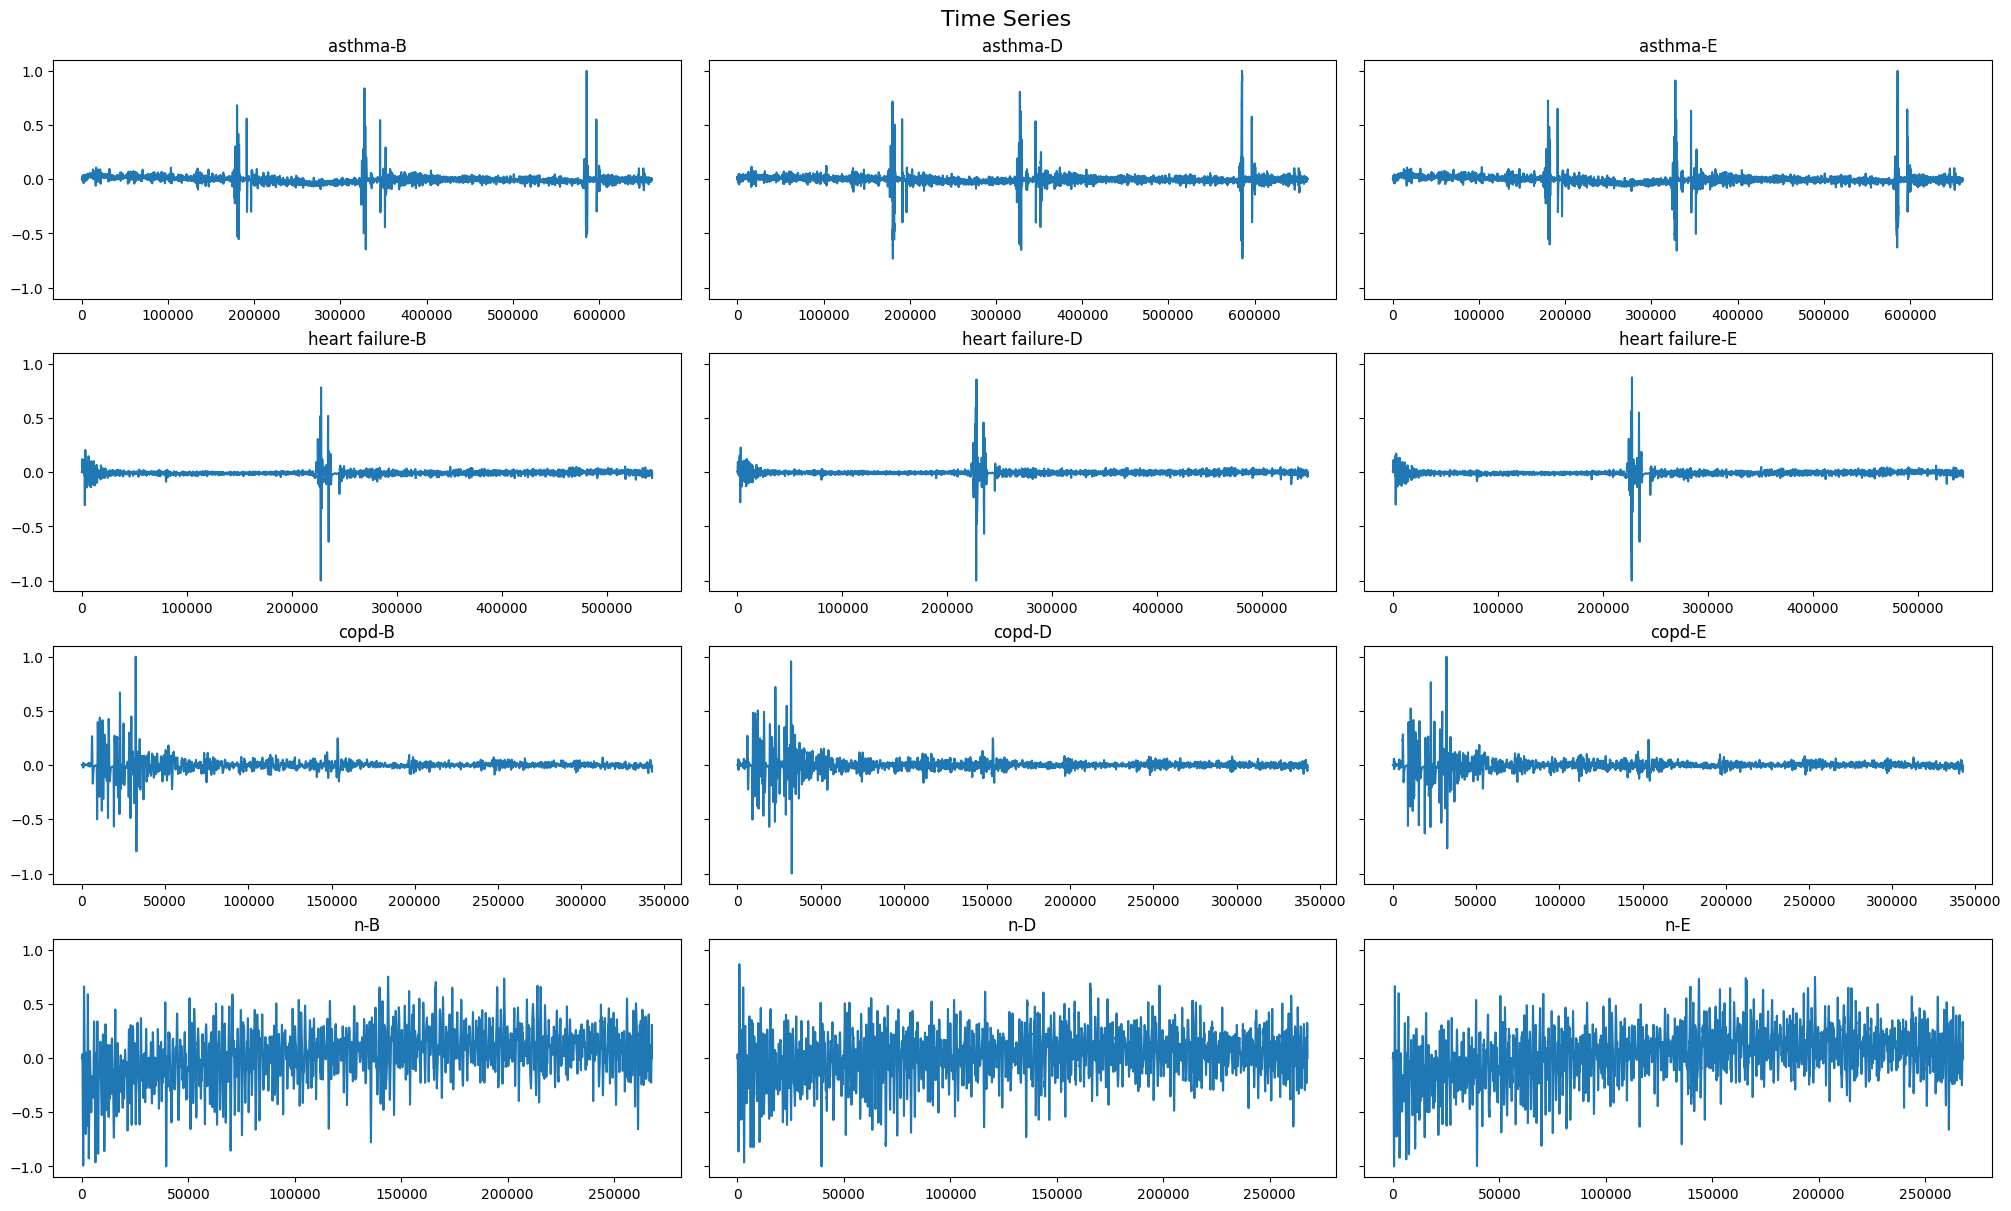

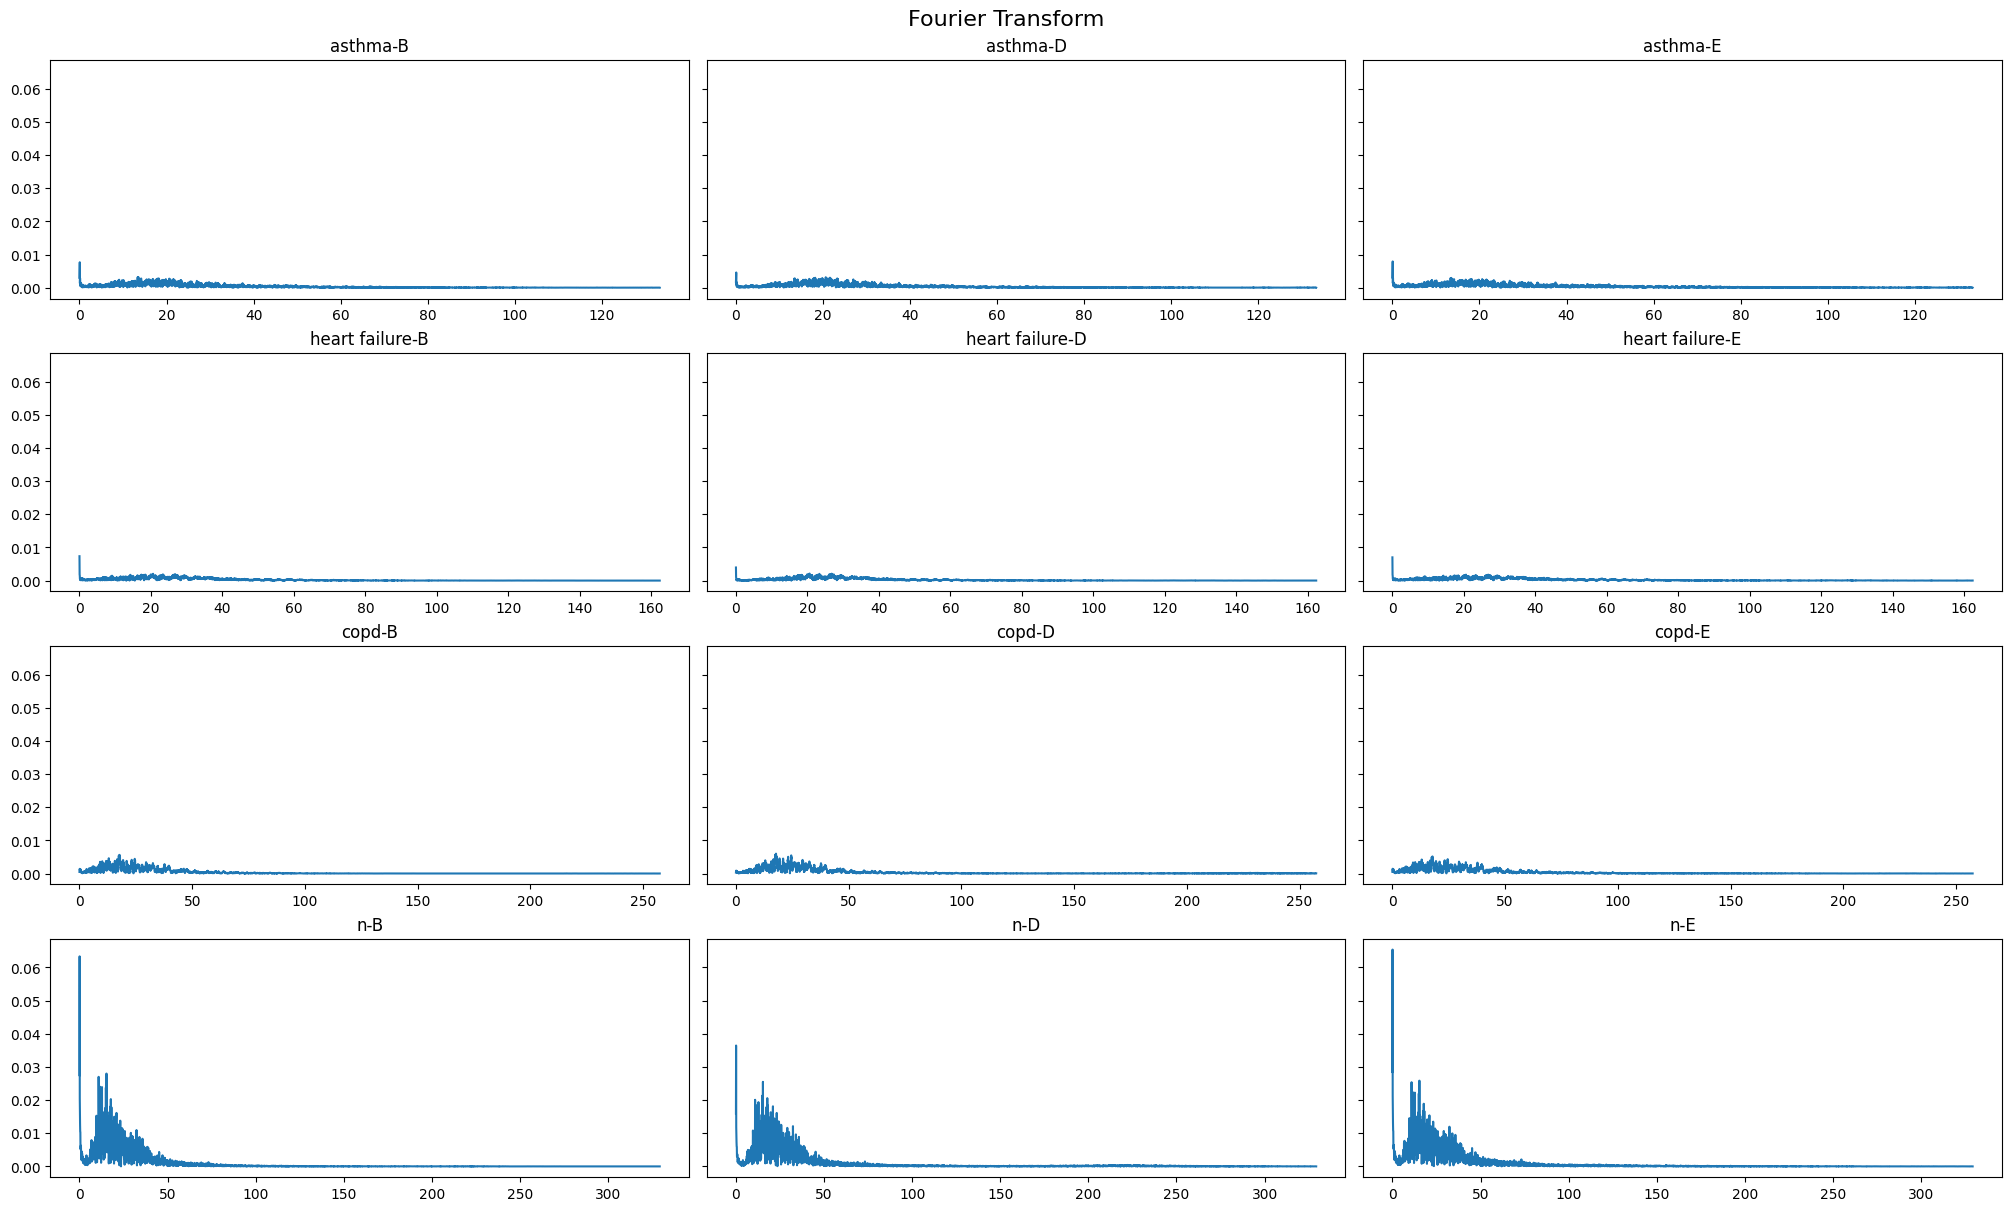

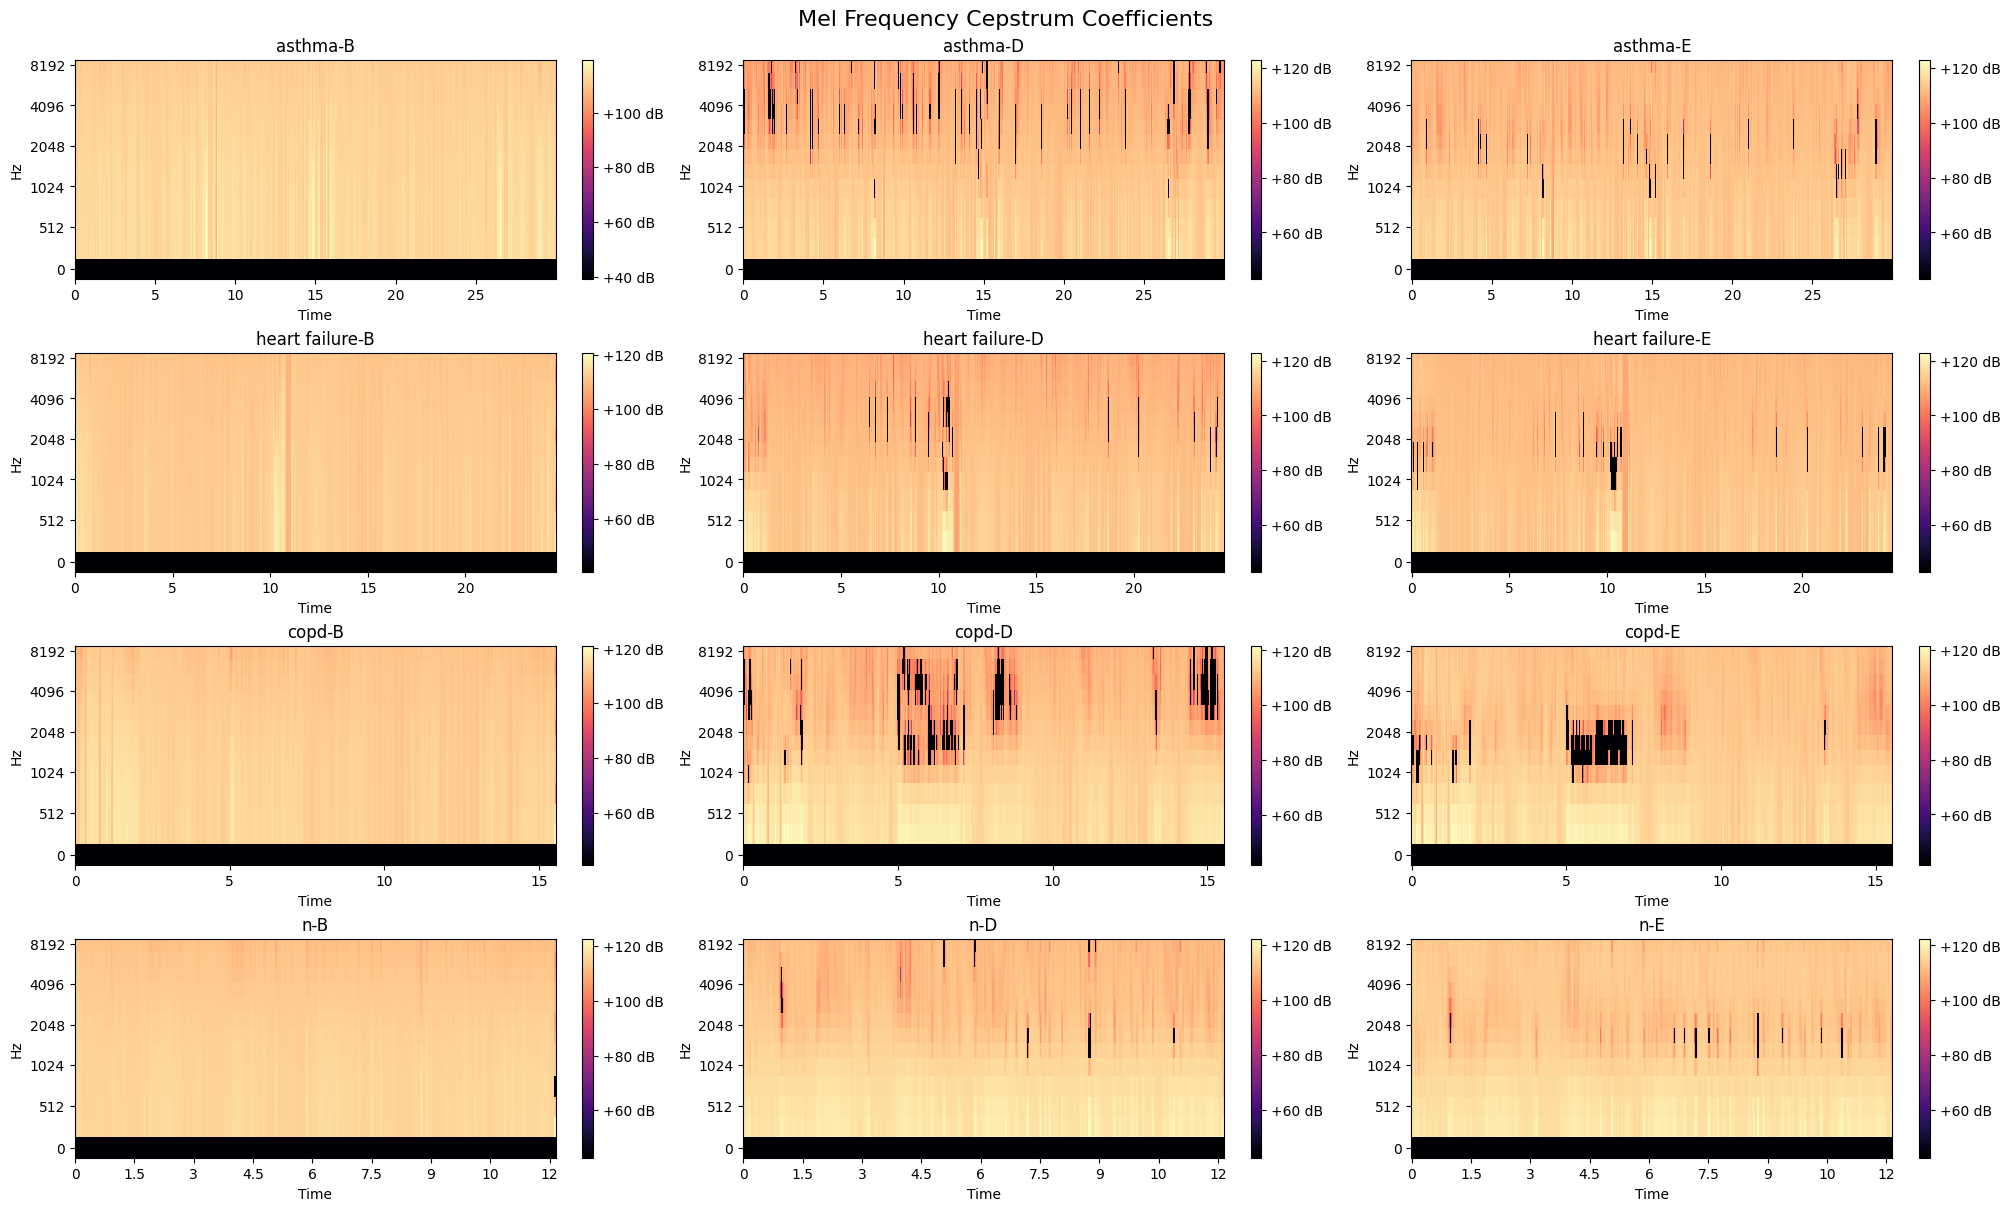

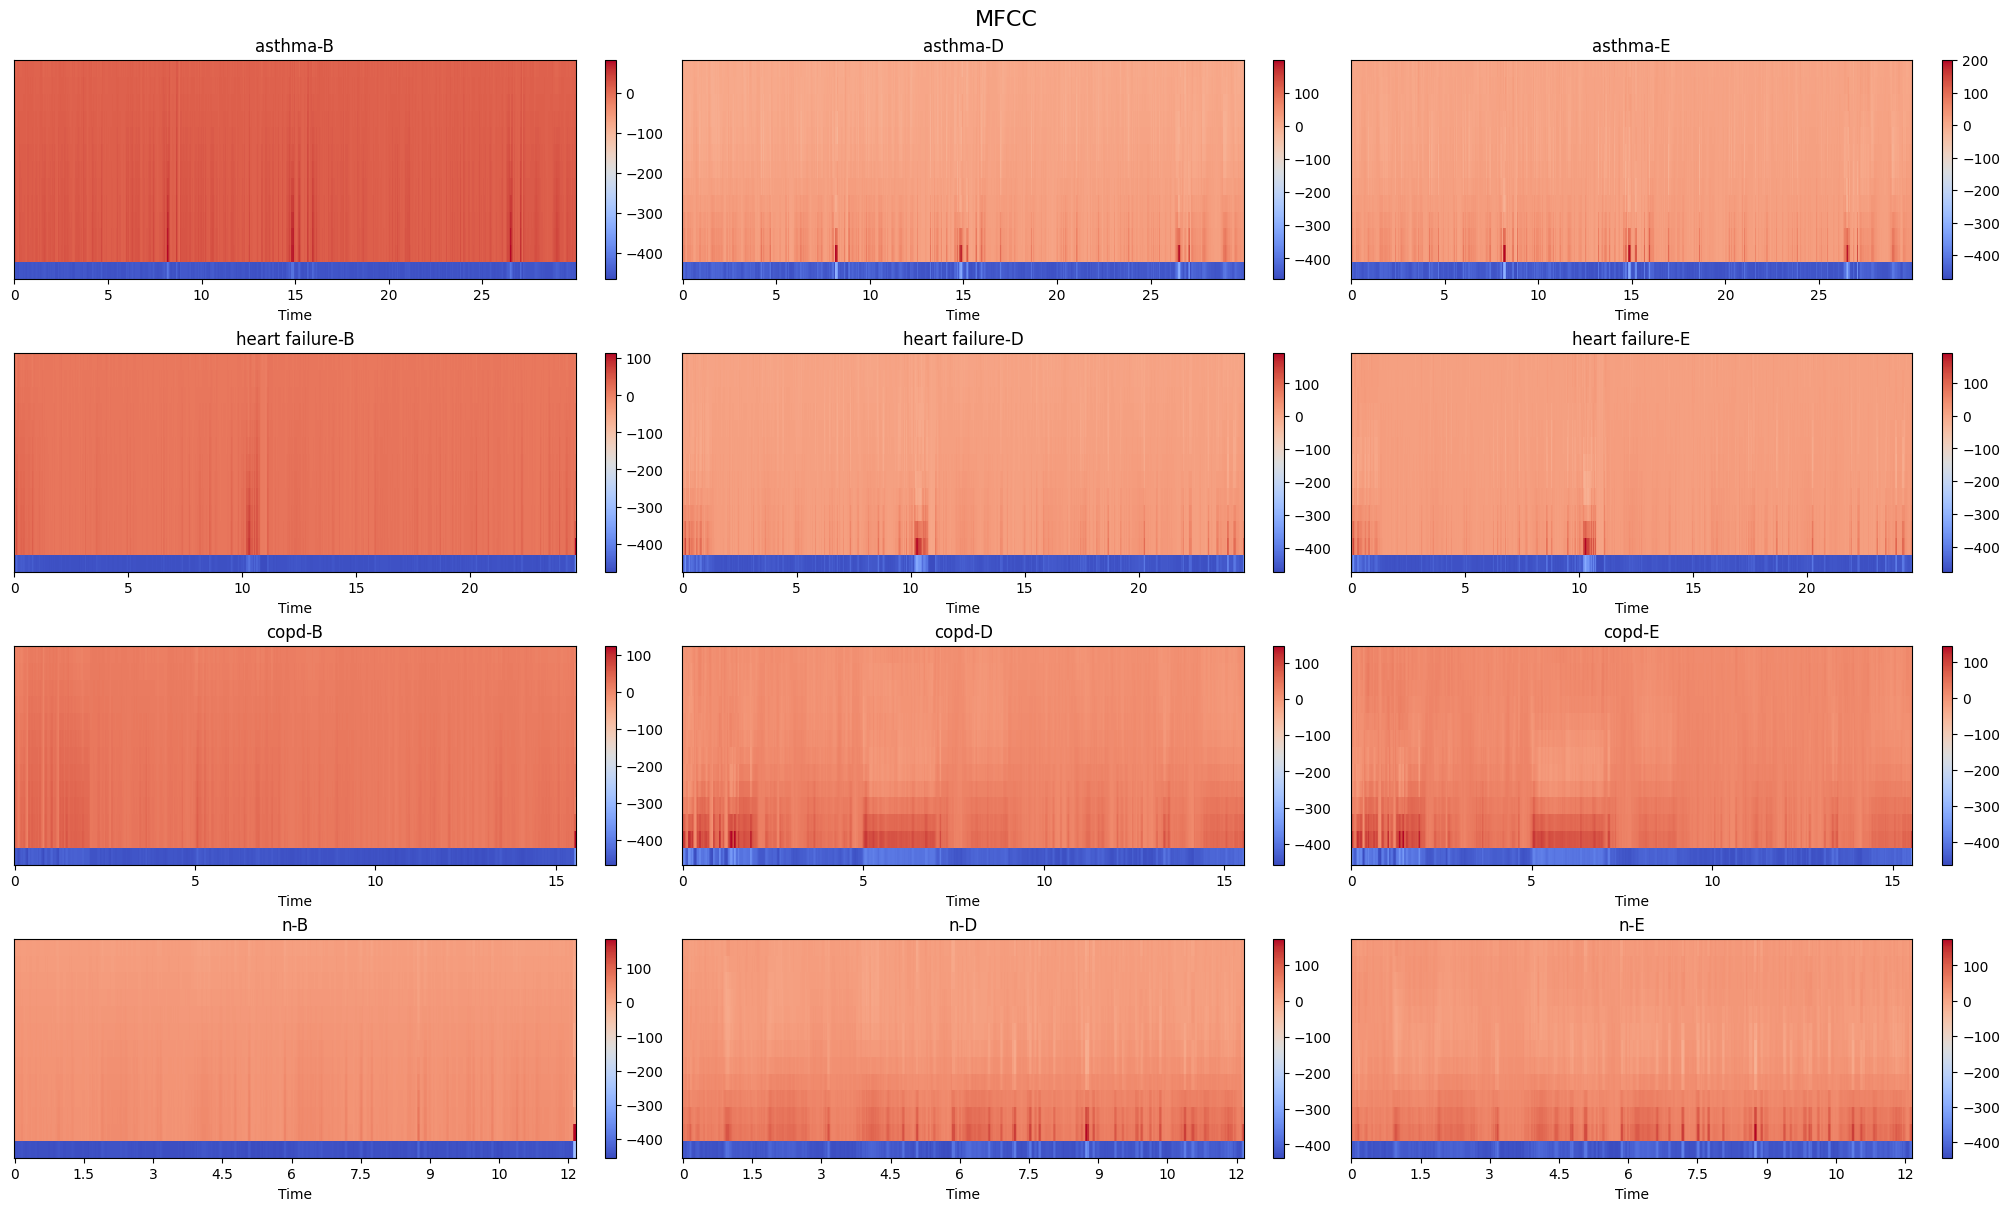

In [36]:
types=['B', 'D', 'E']
classes = df_diseases.disease.unique()

signals={}
fft={}
mfccs={}

def get_fft(y, rate):
  n=len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)
  Y=abs(np.fft.rfft(y))/n
  return (Y, freq)

for c in classes:
  signals[c]={}
  fft[c]={}
  mfccs[c]={}

  for t in types:
    wav_file = df_diseases.loc[df_diseases['disease']==c, t].iloc[0] # take just the first one
    signal, srate = librosa.load(wav_file)
    signals[c][t]=signal
    fft[c][t]=get_fft(signal, srate)
    mel2= librosa.feature.mfcc(y=signal, sr=srate, n_mfcc=13)
    mfccs[c][t]=mel2

plot_signals(signals, classes, types)
plot_fft(fft, classes, types)
plot_mfccs(mfccs, classes, types, np.mean)
plot_mfccs2(mfccs, classes, types)

**Audio transformations functions to Data Augmentation**

In [37]:
from IPython.display import Audio
import librosa
import librosa.display
import numpy as np

def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = librosa.effects.time_stretch(y, rate=1.2)
    y_stretch_2 = librosa.effects.time_stretch(y, rate=0.8) #< 1 slowdown >1 SpeedUp
    y_pitch_shift = librosa.effects.pitch_shift(y, sr=sr, n_steps=3)

    plt.figure(figsize=(20, 8))

    plt.subplot(3,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')

    plt.subplot(3,2,4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')

    plt.subplot(3,2,5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')

    plt.subplot(3,2,6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

**Play Audio file and Visualize Transformations**

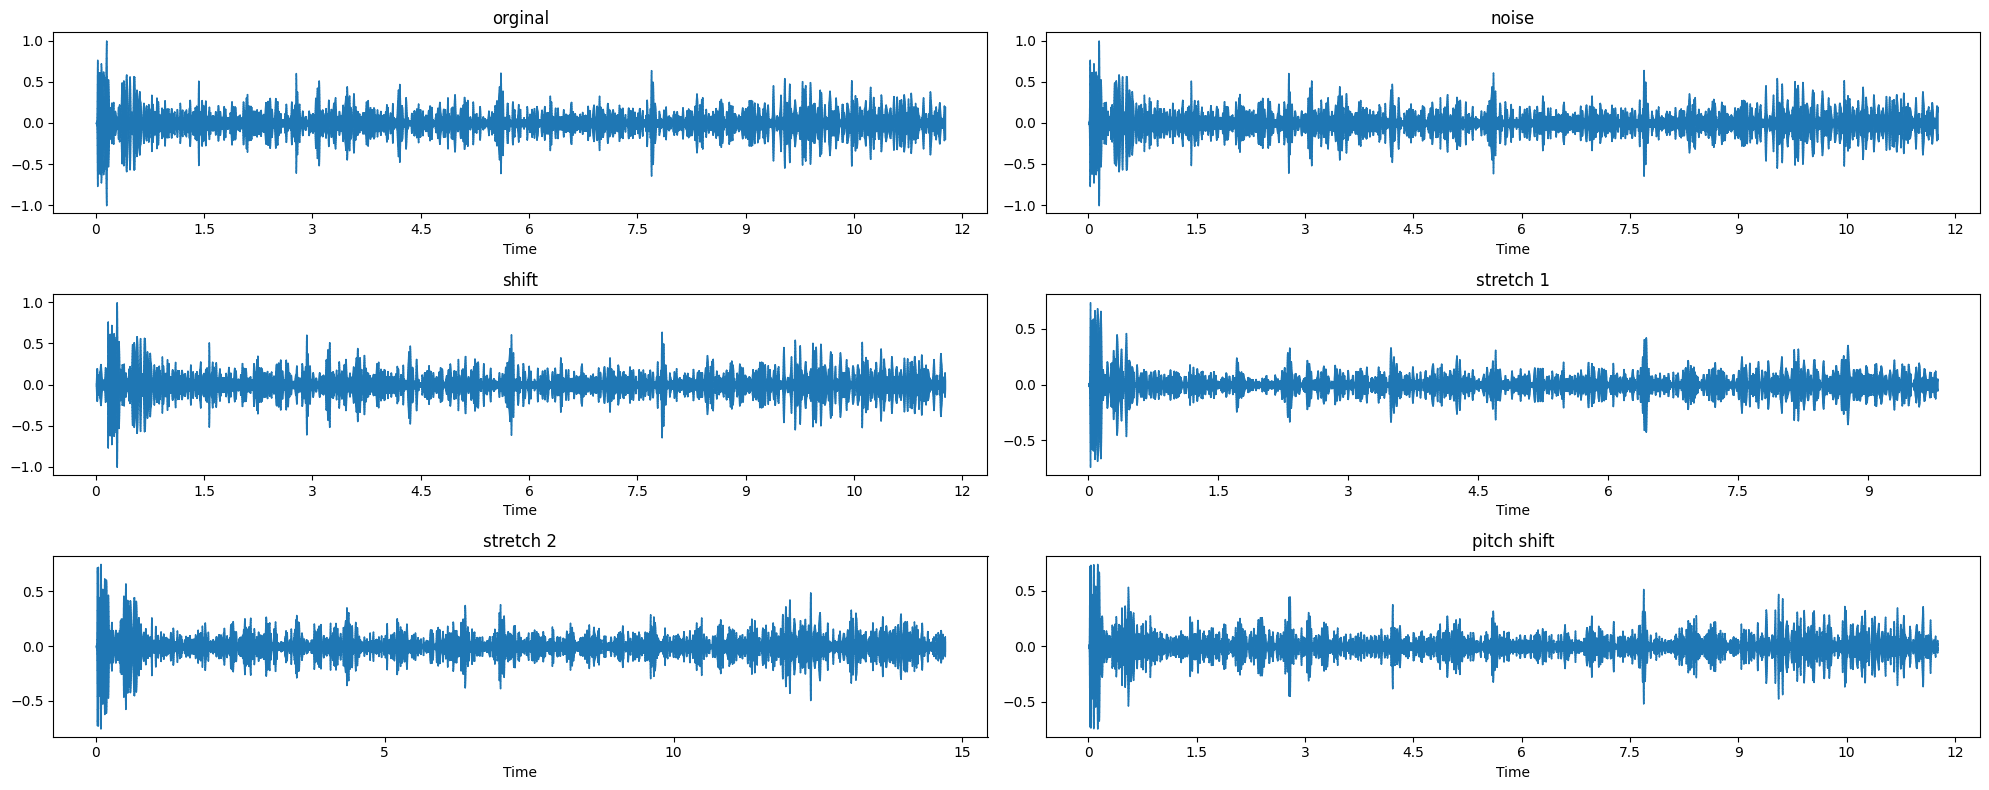

In [38]:
from IPython.display import Audio, display

#sound_file='kaggle_data/Audio Files/BP101_Asthma,E W,P L M,12,F.wav'
sound_file='kaggle_data/Audio Files/BP104_Asthma,E W,P L U,45,F.wav'

show_audio(sound_file)
display(Audio(sound_file, autoplay=True))

### **2. Feature Engineering**

**Drop B type filtering mode from Data**

In [39]:
df_final = df_diseases.drop('B', axis=1)
display(df_final)

,age,sex,location,sound_type,disease,patient,age_range,D,E
0,70,M,PLL,IEW,asthma,1,Age-4,"kaggle_data/Audio Files/DP1_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP1_Asthma,I E W,P L L..."
1,52,F,PLL,EW,asthma,2,Age-3,"kaggle_data/Audio Files/DP2_Asthma,E W,P L L R...","kaggle_data/Audio Files/EP2_Asthma,E W,P L L R..."
2,50,F,PLL,IEW,asthma,3,Age-3,"kaggle_data/Audio Files/DP3_Asthma,I E W,P L L...","kaggle_data/Audio Files/EP3_Asthma,I E W,P L L..."
8,59,M,PRL,EW,asthma,9,Age-3,"kaggle_data/Audio Files/DP9_Asthma,E W,P R L ,...","kaggle_data/Audio Files/EP9_Asthma,E W,P R L ,..."
9,59,M,PRU,EW,asthma,10,Age-3,"kaggle_data/Audio Files/DP10_Asthma,E W,P R U,...","kaggle_data/Audio Files/EP10_Asthma,E W,P R U,..."
...,...,...,...,...,...,...,...,...,...
107,63,M,PRL,EW,copd,108,Age-4,"kaggle_data/Audio Files/DP108_COPD,E W,P R L ,...","kaggle_data/Audio Files/EP108_COPD,E W,P R L ,..."
108,26,M,PLM,N,n,109,Age-2,"kaggle_data/Audio Files/DP109_N,N,P L M,26,M.wav","kaggle_data/Audio Files/EP109_N,N,P L M,26,M.wav"
109,62,M,PLL,EW,copd,110,Age-4,"kaggle_data/Audio Files/DP110_COPD,E W,P L L,6...","kaggle_data/Audio Files/EP110_COPD,E W,P L L,6..."
110,51,M,PRL,EW,copd,111,Age-3,"kaggle_data/Audio Files/DP111_COPD,E W,P R L ,...","kaggle_data/Audio Files/EP111_COPD,E W,P R L ,..."


**Get MFCCs Features and Data Augmentation**

In [40]:
types=['D', 'E']
classes = df_final.disease.unique()
features=40

x_features=[]
y_labels=[]

for c in classes:
  for t in types:
    print(c,t)
    file_names = df_final.loc[df_final['disease']==c, t]

    for wav_file in file_names:
      signal, srate = librosa.load(wav_file)

      mfcc_feats = librosa.feature.mfcc(y=signal, sr=srate, n_mfcc=features).T
      x_features.append(mfcc_feats)
      y_labels.append(c)

      if (c=='asthma'):
        signal_noise = add_noise(signal, 0.001)
        mfcc_feats_noise = librosa.feature.mfcc(y=signal_noise, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_noise)
        y_labels.append(c)

      elif (c=='n'):
        signal_stretch = librosa.effects.time_stretch(signal, rate=0.8) #< 1 slowdown >1 SpeedUp
        mfcc_feats_stretch = librosa.feature.mfcc(y=signal_stretch, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_stretch)
        y_labels.append(c)

      elif (c=='heart failure'):
        signal_noise = add_noise(signal, 0.001)
        mfcc_feats_noise = librosa.feature.mfcc(y=signal_noise, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_noise)
        y_labels.append(c)

        signal_stretch2 = librosa.effects.time_stretch(signal, rate=1.2) #< 1 slowdown >1 SpeedUp
        mfcc_feats_stretch2 = librosa.feature.mfcc(y=signal_stretch2, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_stretch2)
        y_labels.append(c)

        signal_shift = shift(signal,1000)
        mfcc_feats_shift = librosa.feature.mfcc(y=signal_shift, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_shift)
        y_labels.append(c)

      elif (c=='copd'):
        signal_noise = add_noise(signal, 0.001)
        mfcc_feats_noise = librosa.feature.mfcc(y=signal_noise, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_noise)
        y_labels.append(c)

        signal_stretch = librosa.effects.time_stretch(signal, rate=0.8) #< 1 slowdown >1 SpeedUp
        mfcc_feats_stretch = librosa.feature.mfcc(y=signal_stretch, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_stretch)
        y_labels.append(c)

        signal_stretch2 = librosa.effects.time_stretch(signal, rate=1.2) #< 1 slowdown >1 SpeedUp
        mfcc_feats_stretch2 = librosa.feature.mfcc(y=signal_stretch2, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_stretch2)
        y_labels.append(c)

        signal_shift = shift(signal,1200)
        mfcc_feats_shift = librosa.feature.mfcc(y=signal_shift, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_shift)
        y_labels.append(c)

        signal_pitch1 = librosa.effects.pitch_shift(y=signal, sr=srate, n_steps=3)
        mfcc_feats_pitch1 = librosa.feature.mfcc(y=signal_pitch1, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_pitch1)
        y_labels.append(c)

        signal_pitch2 = librosa.effects.pitch_shift(y=signal, sr=srate, n_steps=5)
        mfcc_feats_pitch2 = librosa.feature.mfcc(y=signal_pitch2, sr=srate, n_mfcc=features).T
        x_features.append(mfcc_feats_pitch2)
        y_labels.append(c)


y_data = np.array(y_labels)

asthma D
asthma E
heart failure D
heart failure E
copd D
copd E
n D
n E


**Final Distribution after data Augmentation**

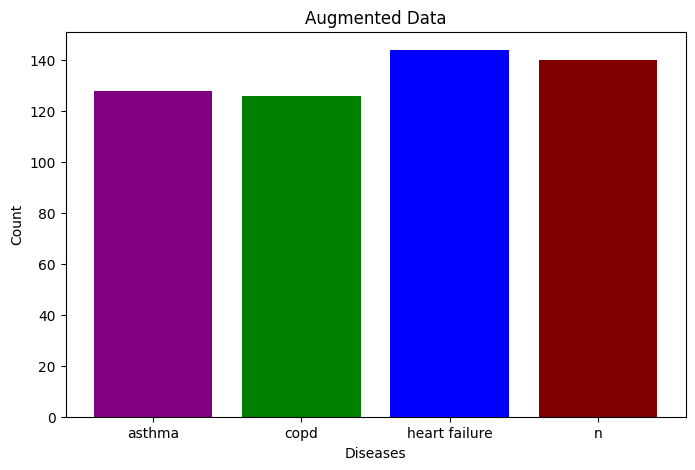

{'asthma': 128, 'copd': 126, 'heart failure': 144, 'n': 140}


In [47]:
def augmented_data_count(x):
    unique, counts = np.unique(x, return_counts=True)
    data_count = dict(zip(unique, counts))

    fig = plt.figure(figsize = (8, 5))
    plt.bar(unique, counts, color =['purple','green','blue','maroon'])

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Augmented Data")
    plt.show()

    print (data_count)

augmented_data_count(y_data)

## **Task 3 - Model**

### **1. Feature Preprocessing**

**Check the features dimension (Please note that features have different dimensions)**

In [45]:
print("len of examples:", len(x_features))
print("len of labels:", len(y_labels))
print()
print("feature dimension0:", x_features[0].ndim)
print("feature shape0:", x_features[0].shape)
print("feature dimension100:", x_features[100].ndim)
print("feature shape100:", x_features[100].shape)

len of examples: 538
len of labels: 538

feature dimension0: 2
feature shape0: (1292, 40)
feature dimension100: 2
feature shape100: (1014, 40)


**Apply Zero Padding in order to get same dimension in all features (including zero values)**

In [46]:
def zero_pad(features):

    new_spoken_train = []
    max_shape = 0
    for x in features:
        all_shapes = x.shape[0]
        if all_shapes > max_shape:
            max_shape = all_shapes

    for x in features:
        difference = max_shape-x.shape[0]
        zero_padded = np.pad(x,((0,difference),(0,0)), "constant")
        new_spoken_train.append(zero_padded)

    new_spoken_train = np.array(new_spoken_train)

    return new_spoken_train

mfcc_features = zero_pad(x_features)
print(mfcc_features.shape)
print(1615*40)

(538, 1615, 40)
64600


**Flatten features in order to apply StandardScaler** (This function standardizes features by removing the mean and scaling to unit variance)

In [48]:
flatten_mfcc_features = np.reshape(mfcc_features,(mfcc_features.shape[0],64600))
print(flatten_mfcc_features.shape)

(538, 64600)


In [49]:
from sklearn.preprocessing import StandardScaler

data = flatten_mfcc_features
scaler = StandardScaler()
mfcc_features = scaler.fit_transform(data)

**Reshaped back to the original shape**

In [51]:
new_mfcc_features = np.reshape(mfcc_features,(mfcc_features.shape[0],1615, 40))
new_mfcc_features.shape

(538, 1615, 40)

**Split data into train and test data**

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfcc_features, y_data, test_size=0.30,
                                                    random_state=42, stratify = y_data, shuffle= True)

**One hot encoding for Labels**

In [54]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
y_train_label_encoder = LabelEncoder()
y_train_integer_encoded = y_train_label_encoder.fit_transform(y_train)
# binary encode
y_train_onehot_encoder = OneHotEncoder(sparse=False)
y_train_integer_encoded = y_train_integer_encoded.reshape(len(y_train_integer_encoded), 1)
y_train_onehot_encoded = y_train_onehot_encoder.fit_transform(y_train_integer_encoded)
print(y_train_onehot_encoded.shape)
print(y_train_onehot_encoded)


(376, 4)
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
y_test = y_test
y_test_values = array(y_test)
# integer encode
y_test_label_encoder = LabelEncoder()
y_test_integer_encoded = y_test_label_encoder.fit_transform(y_test_values)
# binary encode
y_test_onehot_encoder = OneHotEncoder(sparse=False)
y_test_integer_encoded = y_test_integer_encoded.reshape(len(y_test_integer_encoded), 1)
y_test_onehot_encoded = y_test_onehot_encoder.fit_transform(y_test_integer_encoded)
print(y_test_onehot_encoded.shape)

(162, 4)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**Just checking the decoding**

In [57]:
from numpy import argmax
# invert first example
inverted = y_train_label_encoder.inverse_transform([argmax(y_train_onehot_encoded[0, :])])
print(inverted)

for i in range(4):
  val = y_train_label_encoder.inverse_transform([i])
  print(i,val)


['copd']
0 ['asthma']
1 ['copd']
2 ['heart failure']
3 ['n']


### **2. CNN Model**

**Check train and test shapes**

In [68]:
print(X_train.shape)
print(y_train_onehot_encoded.shape)
print(X_test.shape)
print(y_test_onehot_encoded.shape)

(376, 1615, 40)
(376, 4)
(162, 1615, 40)
(162, 4)


**CNN Model architecture**

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, Convolution1D, GlobalMaxPool1D, MaxPool1D
from keras.models import Model
from keras.activations import relu, softmax
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model

def InstantiateModel(in_, n_classes):

    x = Convolution1D(128, 4, activation=relu, padding="same")(in_)
    x = MaxPool1D(2)(x)
    x = Convolution1D(128, 4, activation=relu, padding="same")(x)
    x = Dropout(rate=0.4)(x)
    x = MaxPool1D(2)(x)
    x = Convolution1D(128, 4, activation=relu, padding="same")(x)
    x = Dropout(rate=0.4)(x)
    x = MaxPool1D(2)(x)
    x = Convolution1D(128, 4, activation=relu, padding="same")(x)
    x = Dropout(rate=0.4)(x)
    x = MaxPool1D(2)(x)
    x = Convolution1D(128, 4, activation=relu, padding="same")(x)
    x = Dropout(rate=0.4)(x)
    x = MaxPool1D(2)(x)
    x = Dropout(rate=0.4)(x)
    x = Flatten()(x)
    output = Dense(n_classes, activation=softmax)(x)

    return output

input_tensor = Input(shape=(X_train.shape[1],X_train.shape[2]))
model = Model(inputs=input_tensor, outputs=InstantiateModel(input_tensor, y_train_onehot_encoded.shape[1]))


In [70]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1615, 40)]        0         
                                                                 
 conv1d_5 (Conv1D)           (None, 1615, 128)         20608     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 807, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 807, 128)          65664     
                                                                 
 dropout_5 (Dropout)         (None, 807, 128)          0         
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 403, 128)          0         
 g1D)                                                      

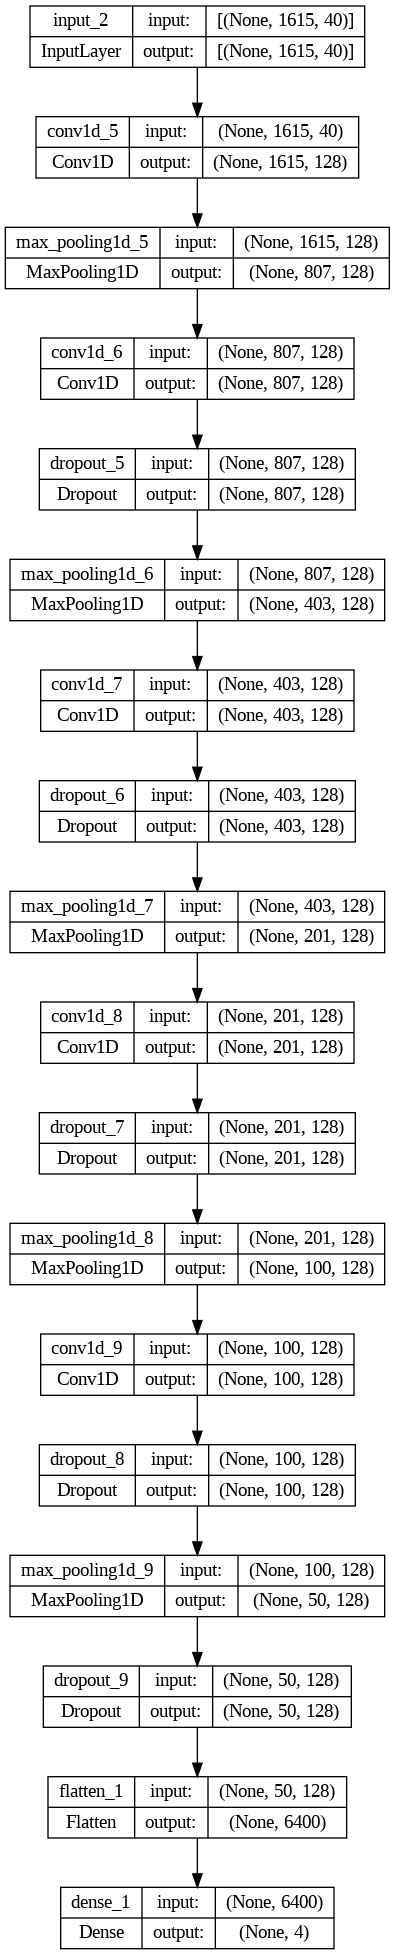

In [71]:
import  tensorflow as tf
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

**Training Model**

In [72]:
from keras.optimizers import RMSprop

opt=tf.keras.optimizers.legacy.RMSprop(learning_rate = 0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

cnnhistory= model.fit(X_train, y_train_onehot_encoded, batch_size=16, epochs= 80, validation_data=(X_test, y_test_onehot_encoded))

Epoch 1/80
24/24 [==============================] - 11s 424ms/step - loss: 1.7022 - accuracy: 0.2606 - val_loss: 1.3492 - val_accuracy: 0.3457
Epoch 2/80
24/24 [==============================] - 9s 359ms/step - loss: 1.3221 - accuracy: 0.3590 - val_loss: 1.3063 - val_accuracy: 0.4259
Epoch 3/80
24/24 [==============================] - 13s 547ms/step - loss: 1.1946 - accuracy: 0.4415 - val_loss: 1.2422 - val_accuracy: 0.4506
Epoch 4/80
24/24 [==============================] - 11s 469ms/step - loss: 1.1071 - accuracy: 0.5239 - val_loss: 1.2108 - val_accuracy: 0.4938
Epoch 5/80
24/24 [==============================] - 10s 408ms/step - loss: 1.0815 - accuracy: 0.5532 - val_loss: 1.1633 - val_accuracy: 0.6049
Epoch 6/80
24/24 [==============================] - 10s 438ms/step - loss: 0.9011 - accuracy: 0.6197 - val_loss: 1.0709 - val_accuracy: 0.6049
Epoch 7/80
24/24 [==============================] - 8s 337ms/step - loss: 0.9388 - accuracy: 0.6410 - val_loss: 1.0189 - val_accuracy: 0.7222
E

**Trainig Results**

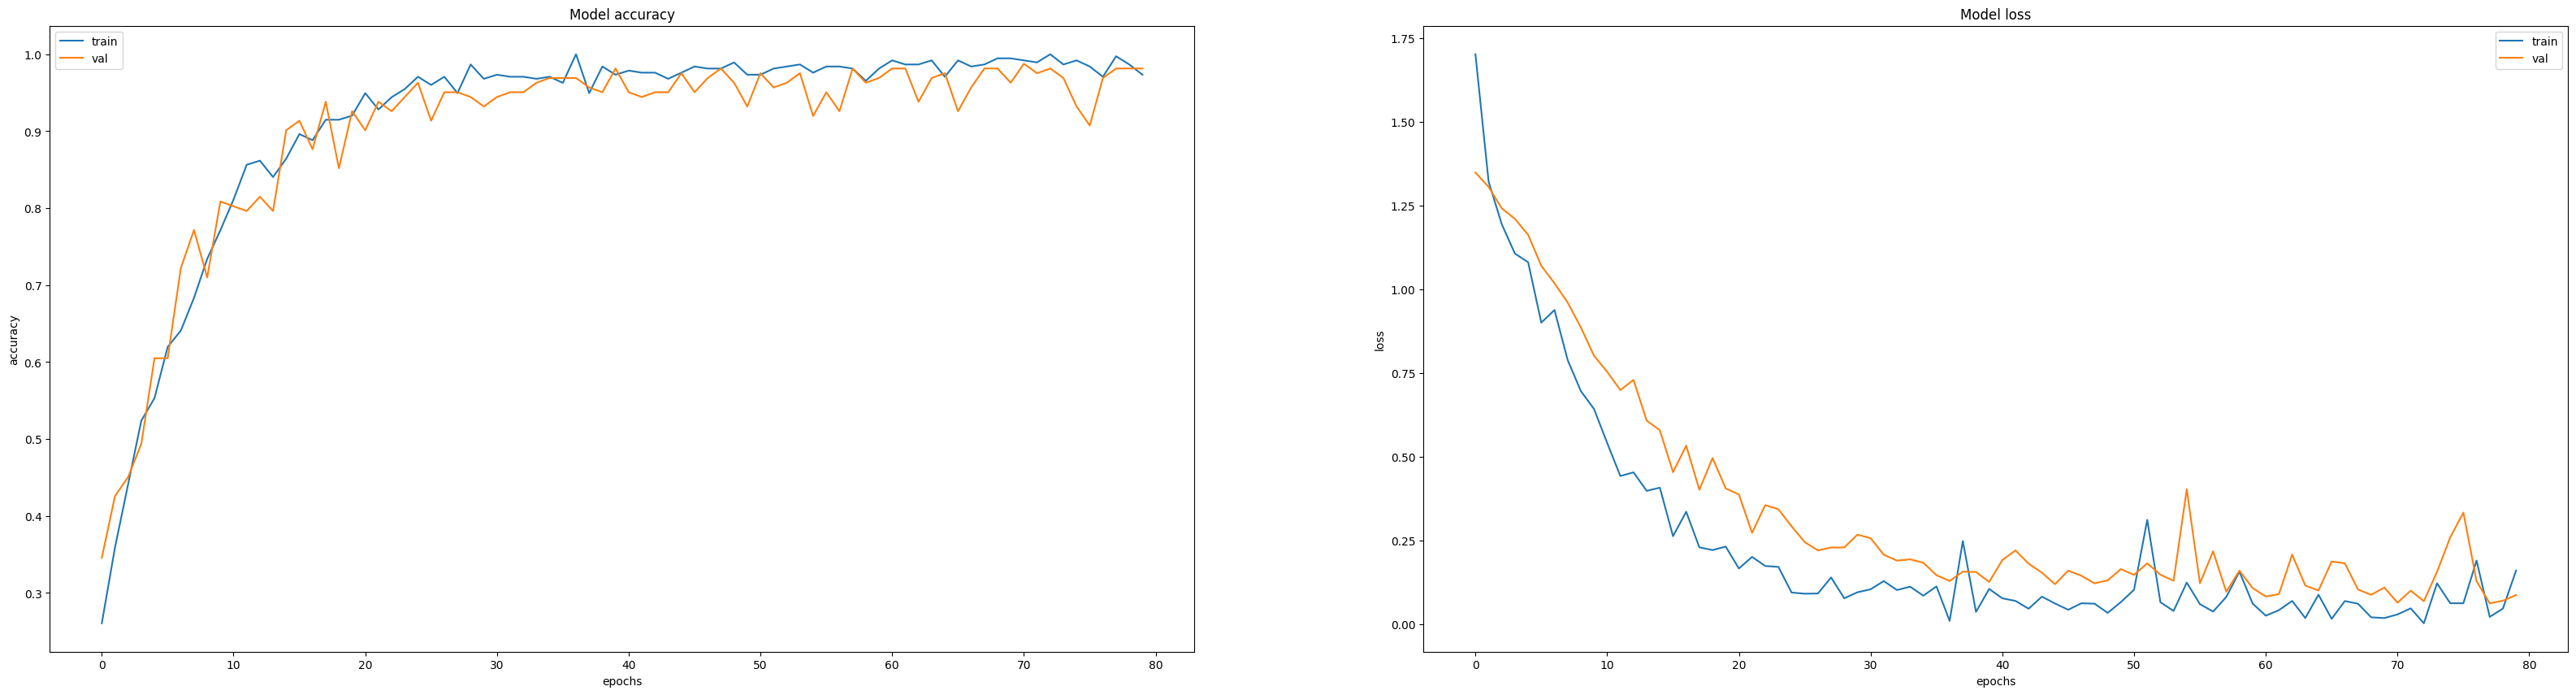

In [78]:
fig, ax = plt.subplots(1, 2, figsize=(40,10))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(cnnhistory.history[met])
    ax[i].plot(cnnhistory.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

**Loss and Accuracy**

In [79]:
Model_Results = model.evaluate(X_test, y_test_onehot_encoded)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

6/6 [==============================] - 1s 180ms/step - loss: 0.0879 - accuracy: 0.9815
LOSS:  0.0879
ACCURACY:  0.9815


**Confusion Matrix**

In [80]:
labels={'asthma': 0, 'copd': 1, 'heart failure': 2, 'n': 3}

6/6 [==============================] - 1s 145ms/step


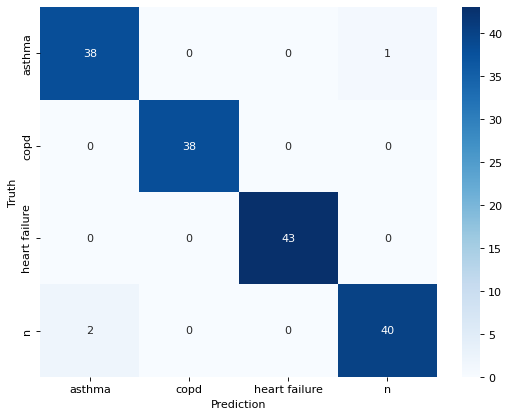

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
classes = labels.keys()
preds = model.predict(X_test)
classpreds = [np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_test_onehot_encoded]
cm = confusion_matrix(y_testclass, classpreds)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [77]:
print(classification_report(y_testclass, classpreds, target_names=classes))

               precision    recall  f1-score   support

       asthma       0.95      0.97      0.96        39
         copd       1.00      1.00      1.00        38
heart failure       1.00      1.00      1.00        43
            n       0.98      0.95      0.96        42

     accuracy                           0.98       162
    macro avg       0.98      0.98      0.98       162
 weighted avg       0.98      0.98      0.98       162

